# Titanic Project

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
 df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
df.shape

(891, 12)

In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


observation-The data set contains multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. Based on these features, we have to predict if an arbitrary passenger on Titanic would survive the sinking or not.


# EDA

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

# Encoding of dataframe

Since the dataset has a lot of string values we will use the encoding techiques to convert the string data to numerical row.

In [10]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [11]:
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))
        

In [12]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,108.0,1.0,22.0,1,0,523.0,7.2500,NaN,2.0
1,2,1,1,190.0,0.0,38.0,1,0,596.0,71.2833,81.0,0.0
2,3,1,3,353.0,0.0,26.0,0,0,669.0,7.9250,NaN,2.0
3,4,1,1,272.0,0.0,35.0,1,0,49.0,53.1000,55.0,2.0
4,5,0,3,15.0,1.0,35.0,0,0,472.0,8.0500,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,548.0,1.0,27.0,0,0,101.0,13.0000,NaN,2.0
887,888,1,1,303.0,0.0,19.0,0,0,14.0,30.0000,30.0,2.0
888,889,0,3,413.0,0.0,NaN,1,2,675.0,23.4500,NaN,2.0
889,890,1,1,81.0,1.0,26.0,0,0,8.0,30.0000,60.0,0.0


converting the columns type from object to flot

In [13]:
df.shape

(891, 12)

In [14]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

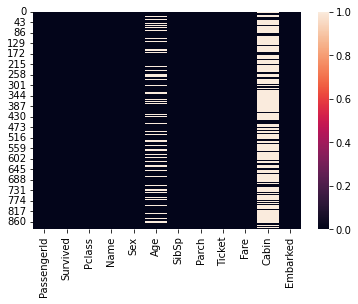

In [15]:
sns.heatmap(df.isnull())

Dataset is not balanced there is null value. in Age column 177 null value,in Cabin column 687 null value and in Embarked column 2 value present.


In [16]:
np.mean(df['Age'])

29.69911764705882

In [17]:
df['Age']=df['Age'].fillna(np.mean(df['Age']))

In [18]:
np.mean(df['Embarked'])

1.5354330708661417

In [19]:
df['Embarked']=df['Embarked'].fillna(np.mean(df['Embarked']))

In [20]:
np.mean(df['Cabin'])

76.0

In [21]:
df['Cabin']=df['Cabin'].fillna(np.mean(df['Cabin']))

In [22]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

0    549
1    342
Name: Survived, dtype: int64


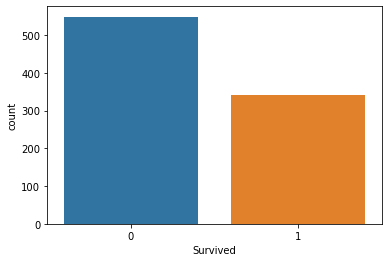

In [23]:
ax=sns.countplot(x="Survived",data=df)
print(df['Survived'].value_counts())

3    491
1    216
2    184
Name: Pclass, dtype: int64


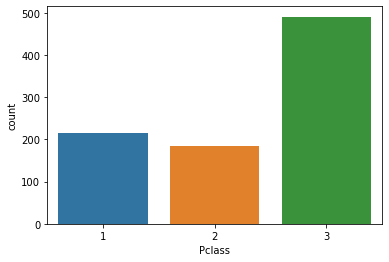

In [24]:
sns.countplot(x="Pclass",data=df)
print(df['Pclass'].value_counts())

1.0    577
0.0    314
Name: Sex, dtype: int64


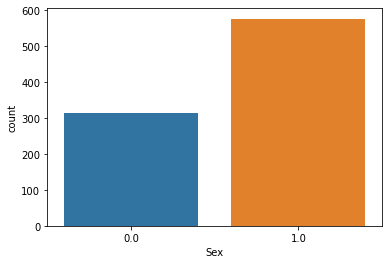

In [25]:
sns.countplot(x="Sex",data=df)
print(df['Sex'].value_counts())

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


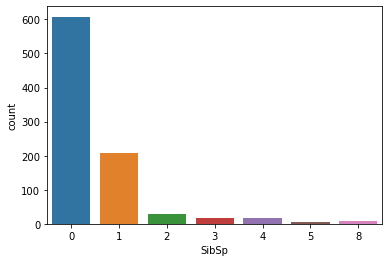

In [26]:
sns.countplot(x="SibSp",data=df)
print(df['SibSp'].value_counts())

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


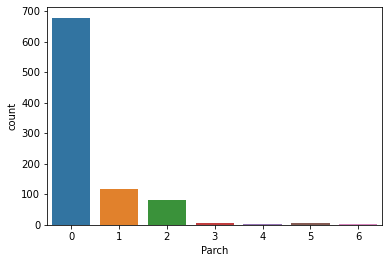

In [27]:
sns.countplot(x="Parch",data=df)
print(df['Parch'].value_counts())

<AxesSubplot:xlabel='Ticket', ylabel='Embarked'>

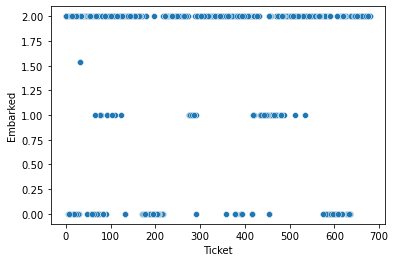

In [28]:
sns.scatterplot(x='Ticket',y='Embarked',data=df)

<AxesSubplot:xlabel='Age', ylabel='Embarked'>

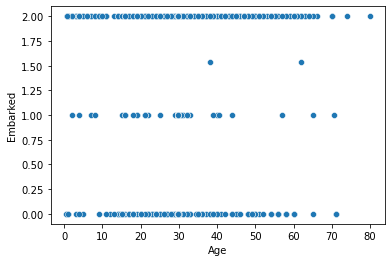

In [29]:
sns.scatterplot(x='Age',y='Embarked',data=df)

<AxesSubplot:xlabel='Fare', ylabel='Embarked'>

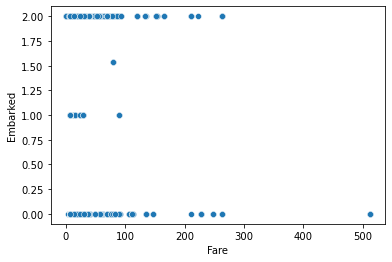

In [30]:
sns.scatterplot(x='Fare',y='Embarked',data=df)

2.000000    644
0.000000    168
1.000000     77
1.535433      2
Name: Embarked, dtype: int64


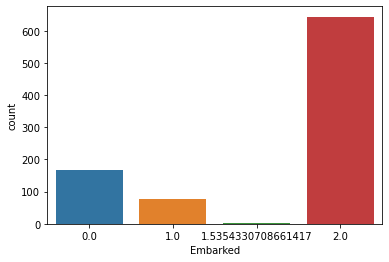

In [31]:
sns.countplot(x='Embarked',data=df )
print(df['Embarked'].value_counts())

<AxesSubplot:xlabel='Cabin', ylabel='Embarked'>

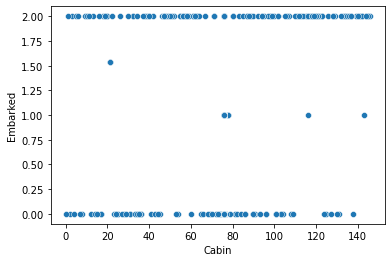

In [32]:
sns.scatterplot(x='Cabin',y='Embarked',data=df)

In [33]:
df.describe()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,445.000000,0.647587,29.699118,0.523008,0.381594,338.528620,32.204208,76.000000,1.535433
std,257.353842,0.486592,0.836071,257.353842,0.477990,13.002015,1.102743,0.806057,200.850657,49.693429,20.170063,0.791197
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,222.500000,0.000000,22.000000,0.000000,0.000000,158.500000,7.910400,76.000000,1.000000
50%,446.000000,0.000000,3.000000,445.000000,1.000000,29.699118,0.000000,0.000000,337.000000,14.454200,76.000000,2.000000
75%,668.500000,1.000000,3.000000,667.500000,1.000000,35.000000,1.000000,0.000000,519.500000,31.000000,76.000000,2.000000
max,891.000000,1.000000,3.000000,890.000000,1.000000,80.000000,8.000000,6.000000,680.000000,512.329200,146.000000,2.000000


observations:
    1.The mean is more than median(50th percentile)in Fare column.
    2.The median is more than mean in all column execpt fare column.
    3.There is a large difference in 75% percentile and max in age ,SibSp,Parch,Ticket,Fare and Cabin.

In [34]:
df.corr()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,1.000000,-0.005007,-0.035144,-0.038559,0.042939,0.033207,-0.057527,-0.001652,-0.056554,0.012658,-0.033173,0.013133
Survived,-0.005007,1.000000,-0.338481,-0.057343,-0.543351,-0.069809,-0.035322,0.081629,-0.164549,0.257307,0.013738,-0.169411
Pclass,-0.035144,-0.338481,1.000000,0.052831,0.131900,-0.331339,0.083081,0.018443,0.319869,-0.549500,0.148182,0.164226
Name,-0.038559,-0.057343,0.052831,1.000000,0.020314,0.057466,-0.017230,-0.049105,0.047348,-0.049173,0.060406,-0.006837
Sex,0.042939,-0.543351,0.131900,0.020314,1.000000,0.084153,-0.114631,-0.245489,0.059372,-0.182333,-0.035079,0.110092
Age,0.033207,-0.069809,-0.331339,0.057466,0.084153,1.000000,-0.232625,-0.179191,-0.068848,0.091566,-0.075461,-0.028819
SibSp,-0.057527,-0.035322,0.083081,-0.017230,-0.114631,-0.232625,1.000000,0.414838,0.079461,0.159651,0.017984,0.068882
Parch,-0.001652,0.081629,0.018443,-0.049105,-0.245489,-0.179191,0.414838,1.000000,0.020003,0.216225,0.004147,0.040438
Ticket,-0.056554,-0.164549,0.319869,0.047348,0.059372,-0.068848,0.079461,0.020003,1.000000,-0.013885,0.066323,0.000284
Fare,0.012658,0.257307,-0.549500,-0.049173,-0.182333,0.091566,0.159651,0.216225,-0.013885,1.000000,-0.185618,-0.226075


<AxesSubplot:>

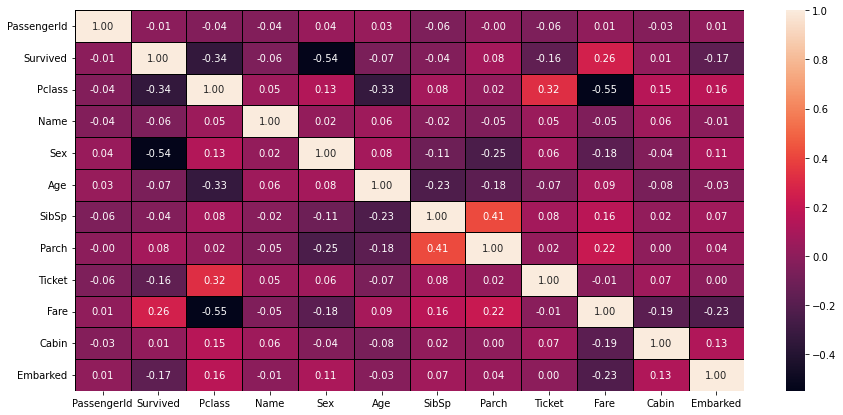

In [35]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True,linewidth=0.5, linecolor='black',fmt='.2f')

Checking the which column is positively related or negatively related to target variable.

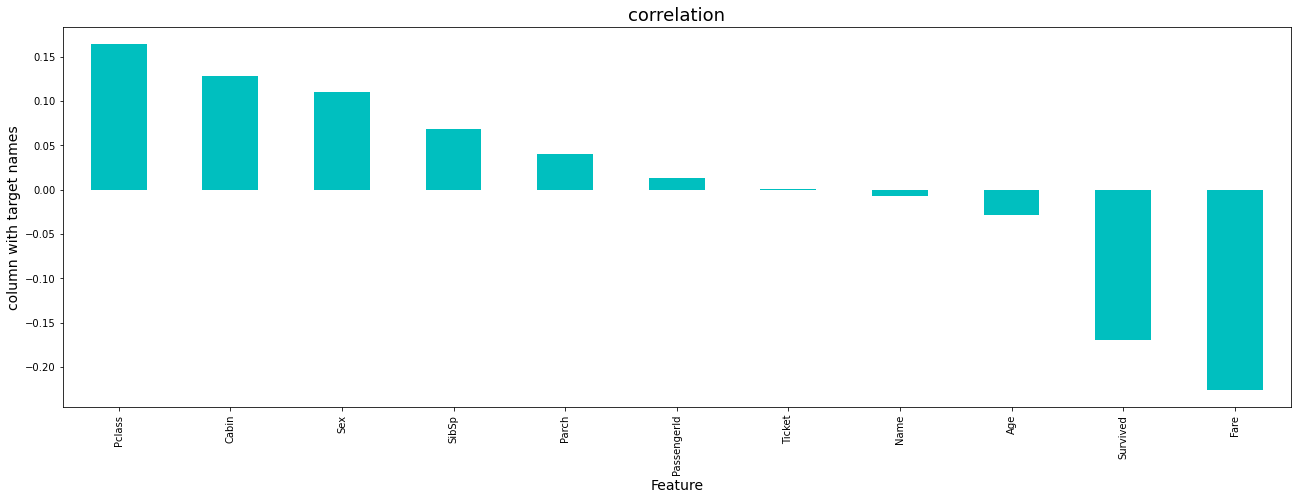

In [36]:
plt.figure(figsize=(22,7))
df.corr()['Embarked'].sort_values(ascending=False).drop(['Embarked']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

Name,Age,Survived,Fare are negatively corelated to target variable.

In [37]:
df.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Name           0.000000
Sex           -0.618921
Age            0.434488
SibSp          3.695352
Parch          2.749117
Ticket         0.000246
Fare           4.787317
Cabin          0.001155
Embarked      -1.262780
dtype: float64

# Outliers check

<AxesSubplot:>

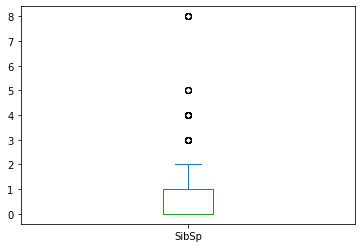

In [38]:
df['SibSp'].plot.box()

<AxesSubplot:>

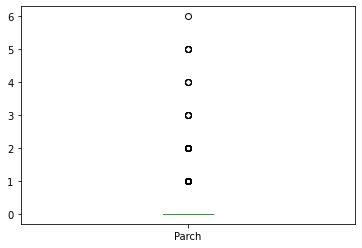

In [39]:
df['Parch'].plot.box()

<AxesSubplot:>

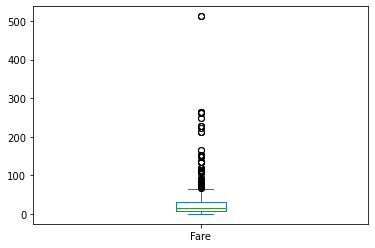

In [40]:
df['Fare'].plot.box()

In [41]:
df=df.drop(['SibSp','Fare'],axis=1)

In [42]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,Parch,Ticket,Cabin,Embarked
0,1,0,3,108.0,1.0,22.000000,0,523.0,76.0,2.0
1,2,1,1,190.0,0.0,38.000000,0,596.0,81.0,0.0
2,3,1,3,353.0,0.0,26.000000,0,669.0,76.0,2.0
3,4,1,1,272.0,0.0,35.000000,0,49.0,55.0,2.0
4,5,0,3,15.0,1.0,35.000000,0,472.0,76.0,2.0
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,548.0,1.0,27.000000,0,101.0,76.0,2.0
887,888,1,1,303.0,0.0,19.000000,0,14.0,30.0,2.0
888,889,0,3,413.0,0.0,29.699118,2,675.0,76.0,2.0
889,890,1,1,81.0,1.0,26.000000,0,8.0,60.0,0.0


# Removing outliers

In [43]:
#z-score technique
x=df.iloc[:,:-1]

In [44]:
x

,PassengerId,Survived,Pclass,Name,Sex,Age,Parch,Ticket,Cabin
0,1,0,3,108.0,1.0,22.000000,0,523.0,76.0
1,2,1,1,190.0,0.0,38.000000,0,596.0,81.0
2,3,1,3,353.0,0.0,26.000000,0,669.0,76.0
3,4,1,1,272.0,0.0,35.000000,0,49.0,55.0
4,5,0,3,15.0,1.0,35.000000,0,472.0,76.0
...,...,...,...,...,...,...,...,...,...
886,887,0,2,548.0,1.0,27.000000,0,101.0,76.0
887,888,1,1,303.0,0.0,19.000000,0,14.0,30.0
888,889,0,3,413.0,0.0,29.699118,2,675.0,76.0
889,890,1,1,81.0,1.0,26.000000,0,8.0,60.0


In [45]:
y=df.iloc[:,-1]

In [46]:
y

0      2.0
1      0.0
2      2.0
3      2.0
4      2.0
      ... 
886    2.0
887    2.0
888    2.0
889    0.0
890    1.0
Name: Embarked, Length: 891, dtype: float64

In [47]:
from scipy.stats import zscore
z=np.abs(zscore(x))
thereshold=3
print(np.where(z>3))

(array([ 10,  13,  23,  25,  66,  75,  86,  96,  96, 116, 128, 148, 167,
       174, 183, 185, 193, 205, 209, 251, 284, 339, 340, 345, 360, 394,
       437, 438, 445, 475, 493, 516, 556, 567, 583, 599, 610, 618, 630,
       630, 638, 647, 672, 678, 699, 715, 724, 736, 737, 745, 774, 776,
       806, 809, 851, 858, 867, 885], dtype=int64), array([8, 6, 8, 6, 8, 8, 6, 5, 8, 5, 8, 8, 6, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 6, 8, 6, 6, 8, 8, 5, 8, 8, 6, 8, 8, 6, 8, 5, 8, 6, 8, 5, 6,
       8, 8, 8, 6, 8, 5, 6, 8, 8, 8, 5, 6, 8, 6], dtype=int64))


In [48]:
df=df[(z<3).all(axis=1)]
df.shape

(835, 10)

In [49]:
df_new=df[(z<3).all(axis=1)]
df_new.shape

(835, 10)

 Percentage_data loss

In [50]:
loss_percent=(891-799)/891*100
print(loss_percent)

10.32547699214366


# Training and testing

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split


In [52]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=50)

In [53]:
x_train.shape

(712, 9)

In [54]:
x_test.shape

(179, 9)

In [55]:
y_train.shape

(712,)

In [56]:
y_test.shape

(179,)

In [57]:
lm=LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [58]:
pred=lm.predict(x_test)
print("predicated result price",pred)
print("actual price",y_test)


predicated result price [1.64382428 1.37092375 1.60279147 1.19127154 1.64079653 1.62624403
 1.77887146 1.64963659 1.61525818 1.42345659 1.36747225 1.46423793
 1.70519942 1.45239067 1.64498751 1.66331282 1.3513747  1.49879578
 1.27601803 1.6503284  1.5785843  1.8256271  1.37087944 1.20433322
 1.7010257  1.71527305 1.7155017  1.45404792 1.45350674 1.72707025
 1.38219627 1.4040973  1.65051014 1.56195395 1.44888432 1.67387778
 1.36182894 1.62970398 1.59140994 1.64724153 1.45785926 1.22526424
 1.47088169 1.45345162 1.51256033 1.77146106 1.50799468 1.53805829
 1.32526449 1.6984034  1.39825514 1.02360904 1.7237183  1.58884573
 1.60175933 1.5616317  1.61767187 1.70645422 1.65808801 1.65249151
 1.47509318 1.70646634 1.70787135 1.74656759 1.70479676 1.66416829
 1.70551279 1.58117612 1.20420386 1.69375313 1.44221017 1.59508312
 1.68510836 1.06888212 1.46616346 1.6301087  1.65000922 1.29591361
 1.62305338 1.63590015 1.61255849 1.4409034  1.49502662 1.66946441
 1.86332554 1.97981032 1.50693147 1.25

In [59]:
print('mean absoluate error:',mean_absolute_error(y_test,pred))
print('mean squared error:',mean_squared_error(y_test,pred))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,pred)))

mean absoluate error: 0.6376879038992135
mean squared error: 0.596548330641175
Root mean squared error: 0.772365412639105


In [60]:
from sklearn.metrics import r2_score
print(r2_score(y_test,pred))

0.08510410386397238


# Cross validation score 

In [ ]:
train_accurancy=r2_score(y_train,pred)

In [64]:
test_accuracy=r2_score(y_test,pred)

In [ ]:
from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lm,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f'at cross fold{j}the cv score is{cv_mean}and accurancy score for training is {train_accurancy}and accurancy for the testing is {test_accurancy}')
    print('\n')

In [66]:
from sklearn.model_selection import  GridSearchCV
from sklearn.linear_model import Lasso

In [67]:
parameters={'alpha':[.0001,.001,.01,.1,1,10],
           'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 0.0001, 'random_state': 0}


In [68]:
ls=Lasso(alpha=10,random_state=0)
ls.fit(x_train,y_train)
ls_score_training=ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)
ls_score_training*100


0.0

In [69]:
pred_ls=ls.predict(x_test)
lss=r2_score(y_test,pred_ls)
lss*100

-0.5860942683269865

In [71]:
cv_score=cross_val_score(ls,x,y,cv=5)
cv_mean=cv_score.mean()
cv_mean*100

-0.22594306946296605

In [70]:
from sklearn.model_selection import  GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
parameters={'criterion':['mse','mae'],
           'max_features':['auto','sqrt','log2']}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'auto'}


In [72]:
import pickle

In [73]:
filename='Titanic predict'
pickle.dump(rf,open(filename,'wb'))